В данном ноутбуке реализована картинка для иллюстрации бродкастинга. Исходное изображение из [туториала](https://scipy.github.io/old-wiki/pages/EricsBroadcastingDoc) имеет слишком плохое разрешение, поэтому было решено его перерисовать. 

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.patches import FancyArrowPatch

from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [2]:
class Arrow3D(FancyArrowPatch):

    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._xyz = (x, y, z)
        self._dxdydz = (dx, dy, dz)

    def draw(self, renderer):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)
        
    def do_3d_projection(self, renderer=None):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))

        return np.min(zs) 

def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''

    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)

In [3]:
setattr(Axes3D, 'arrow3D', _arrow3D)

In [4]:
def make_array(zero, shape): 
    return (
        (zero[0] <= x) & (x < zero[0] + shape[0]) & 
        (zero[1] <= y) & (y < zero[1] + shape[1]) & 
        (zero[2] <= z) & (z < zero[2] + shape[2])
    )

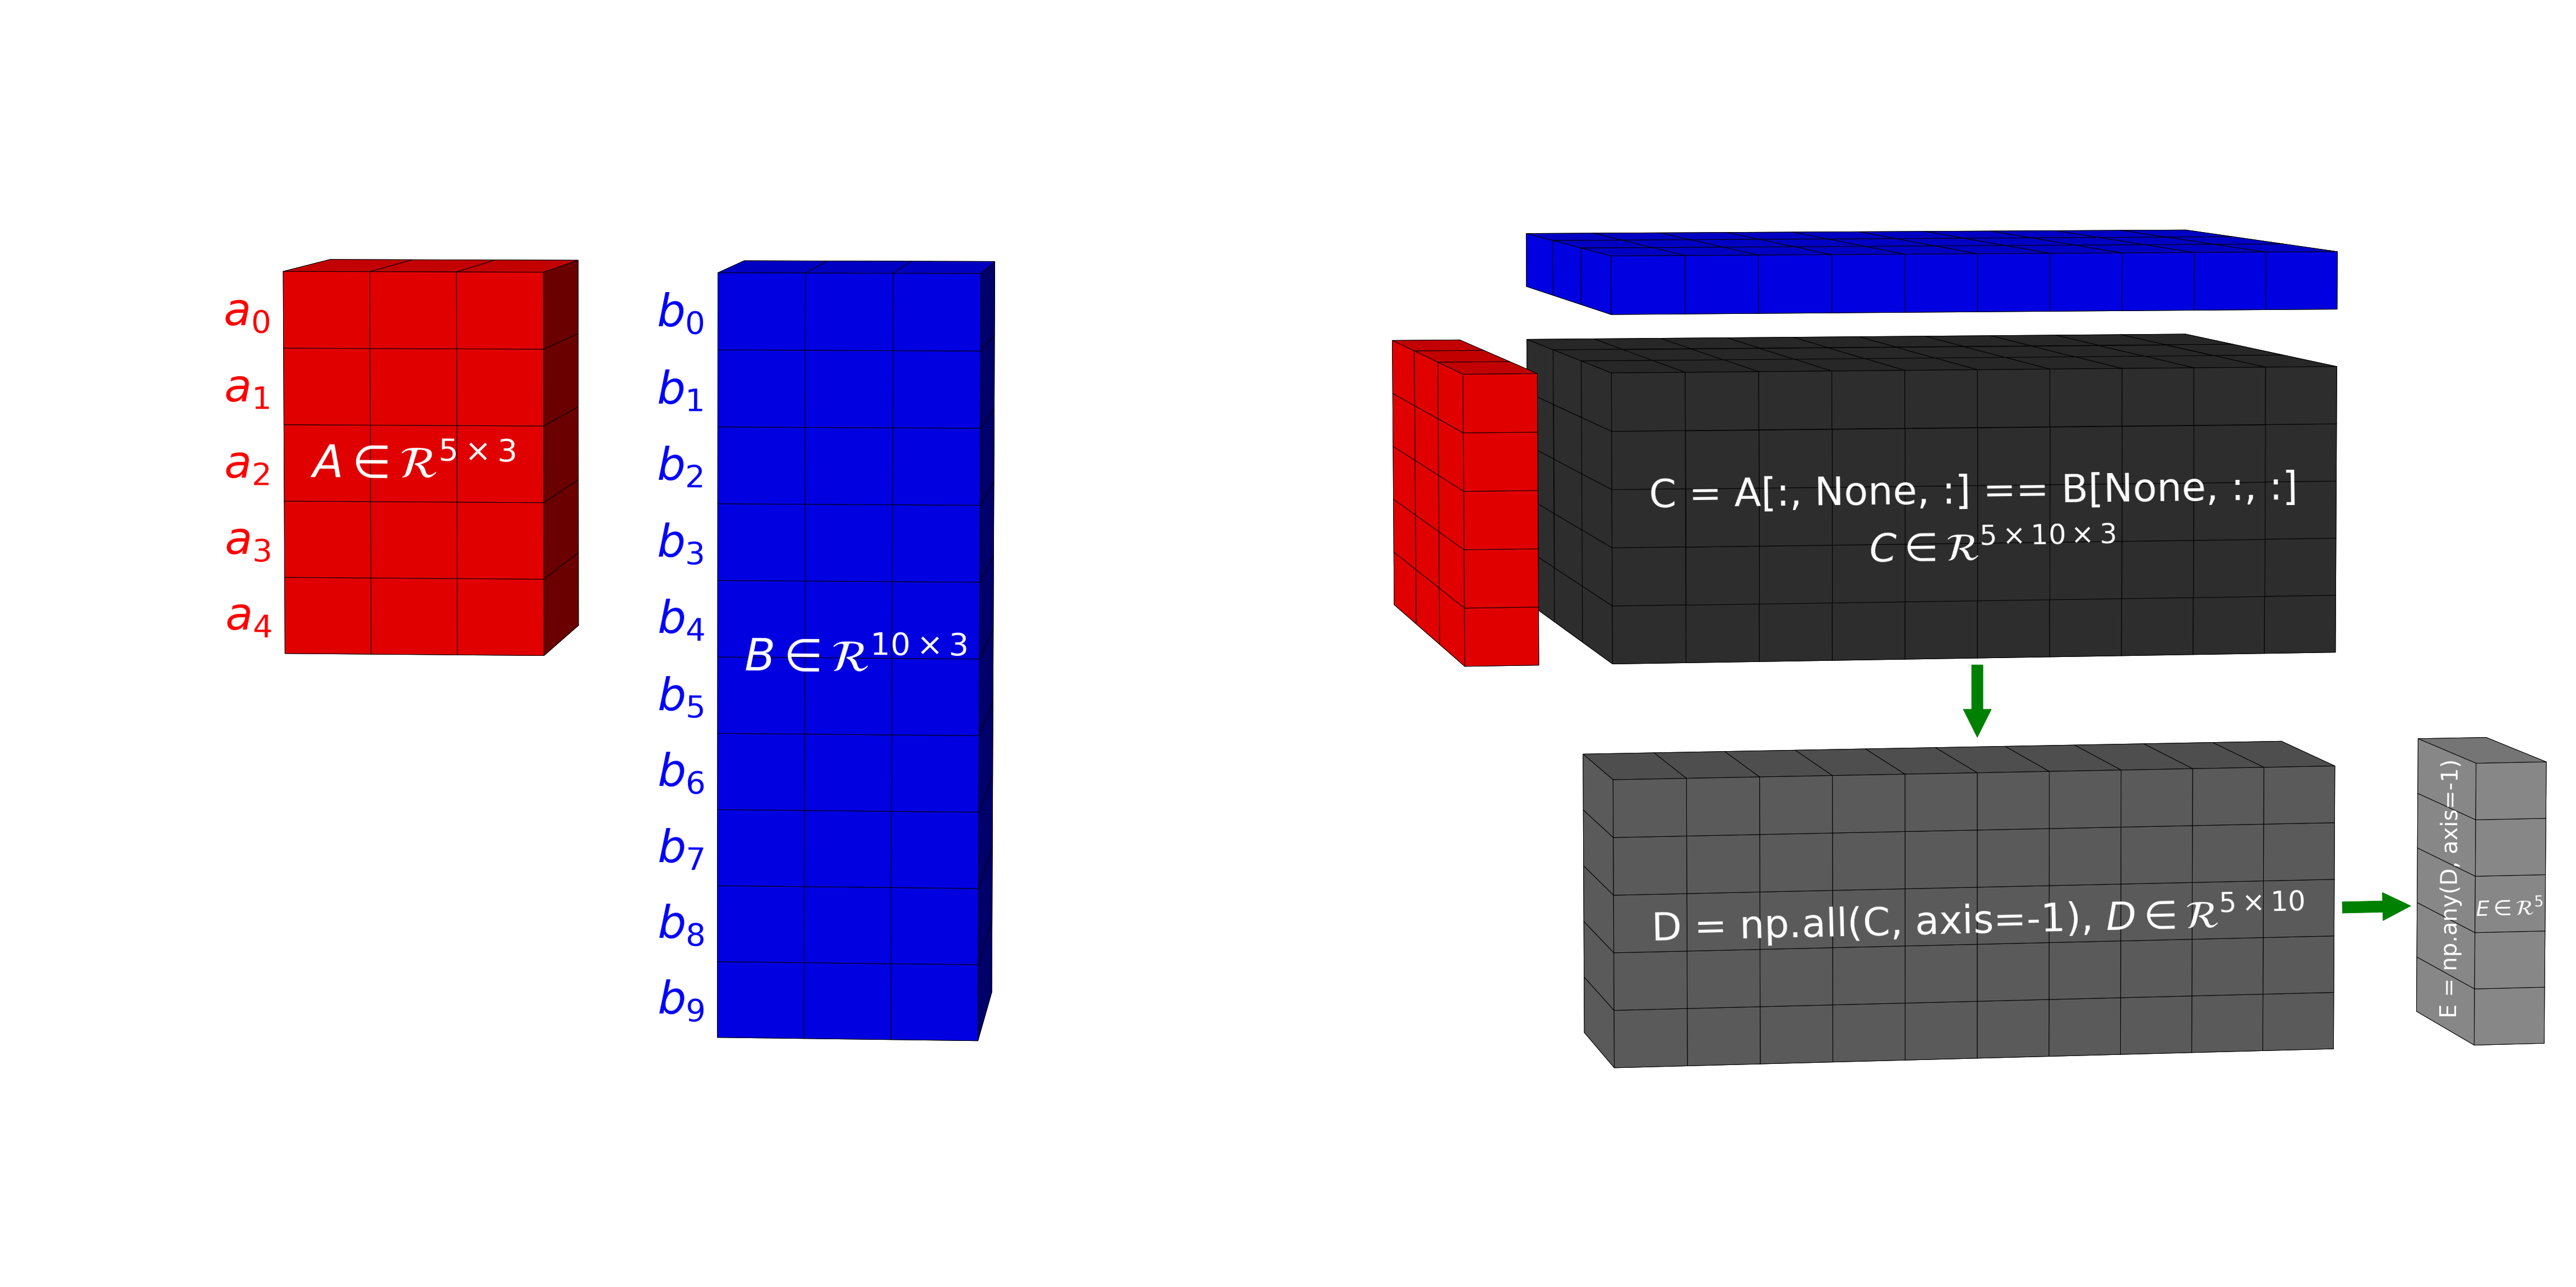

In [5]:
fig = plt.figure(figsize=plt.figaspect(0.5) * 8)
gs = fig.add_gridspec(1, 2, width_ratios=[1, 1], height_ratios=[1])

ax_left = fig.add_subplot(gs[0], projection='3d')
ax_left.set_box_aspect([1, 1, 1])
ax_left.view_init(5, -85)

# prepare some coordinates
x, y, z = np.indices((8, 2, 10))

A_shape, B_shape = (3, 1, 5), (3, 1, 10)
A_zero, B_zero = (0, 0, 5), (5, 0, 0)

array_A = make_array(A_zero, A_shape)
array_B = make_array(B_zero, B_shape)

# combine the objects into a single boolean array
voxelarray = array_A | array_B

# set the colors of each object
colors = np.empty(list(voxelarray.shape) + [4])
colors[:] = np.array([(0, 0, 0, 1)])
colors[array_A] = (1, 0, 0, 1)
colors[array_B] = (0, 0, 1, 1)

x, y, z = np.indices(np.array(voxelarray.shape) + 1).astype(np.float32)
ax_left.voxels(x, y, z, voxelarray, facecolors=colors, edgecolor='k')

ax_left.text(-0.7, 0, 9.3, r'$a_{0}$', color='red', size=80, zdir=(0.5, 0, 0))
ax_left.text(-0.7, 0, 8.3, r'$a_{1}$', color='red', size=80, zdir=(0.5, 0, 0))
ax_left.text(-0.7, 0, 7.3, r'$a_{2}$', color='red', size=80, zdir=(0.5, 0, 0))
ax_left.text(-0.7, 0, 6.3, r'$a_{3}$', color='red', size=80, zdir=(0.5, 0, 0))
ax_left.text(-0.7, 0, 5.3, r'$a_{4}$', color='red', size=80, zdir=(0.5, 0, 0))

ax_left.text(0.3, 0, 7.3, r'$A \in \mathcal{R}^{5 \times 3}$', color='white', size=80, zorder=200, zdir=(0.5, 0, 0))

ax_left.text(4.3, 0, 9.3, r'$b_{0}$', color='blue', size=80, zdir=(0.5, 0, 0))
ax_left.text(4.3, 0, 8.3, r'$b_{1}$', color='blue', size=80, zdir=(0.5, 0, 0))
ax_left.text(4.3, 0, 7.3, r'$b_{2}$', color='blue', size=80, zdir=(0.5, 0, 0))
ax_left.text(4.3, 0, 6.3, r'$b_{3}$', color='blue', size=80, zdir=(0.5, 0, 0))
ax_left.text(4.3, 0, 5.3, r'$b_{4}$', color='blue', size=80, zdir=(0.5, 0, 0))
ax_left.text(4.3, 0, 4.3, r'$b_{5}$', color='blue', size=80, zdir=(0.5, 0, 0))
ax_left.text(4.3, 0, 3.3, r'$b_{6}$', color='blue', size=80, zdir=(0.5, 0, 0))
ax_left.text(4.3, 0, 2.3, r'$b_{7}$', color='blue', size=80, zdir=(0.5, 0, 0))
ax_left.text(4.3, 0, 1.3, r'$b_{8}$', color='blue', size=80, zdir=(0.5, 0, 0))
ax_left.text(4.3, 0, 0.3, r'$b_{9}$', color='blue', size=80, zdir=(0.5, 0, 0))

ax_left.text(5.3, 0, 4.8, r'$B \in \mathcal{R}^{10 \times 3}$', color='white', size=80, zorder=200, zdir=(0.5, 0, 0))

ax_left.axis('off')


ax_right = fig.add_subplot(gs[1], projection='3d')
ax_right.set_box_aspect([1.5, 1, 1])
ax_right.view_init(5, -100)

# prepare some coordinates
x, y, z = np.indices((15, 3, 14))

A_shape, B_shape, C_shape, D_shape, E_shape = (1, 3, 5), (10, 3, 1), (10, 3, 5), (10, 1, 5), (1, 1, 5)
A_zero, B_zero, C_zero, D_zero, E_zero = (0, 0, 7), (2, 0, 13), (2, 0, 7), (2, 0, 0), (14, 0, 0)

array_A = make_array(A_zero, A_shape)
array_B = make_array(B_zero, B_shape)
array_C = make_array(C_zero, C_shape)
array_D = make_array(D_zero, D_shape)
array_E = make_array(E_zero, E_shape)

# combine the objects into a single boolean array
voxelarray = array_A | array_B | array_C | array_D | array_E

# set the colors of each object
colors = np.empty(list(voxelarray.shape) + [4])
colors[:] = np.array([(0, 0, 0, 1)])
colors[array_A] = (1, 0, 0, 1)
colors[array_B] = (0, 0, 1, 1)
colors[array_C] = (0.2, 0.2, 0.2, 1)
colors[array_D] = (0.4, 0.4, 0.4, 1)
colors[array_E] = (0.6, 0.6, 0.6, 1)

x, y, z = np.indices(np.array(voxelarray.shape) + 1).astype(np.float32)
ax_right.voxels(x, y, z, voxelarray, facecolors=colors, edgecolor='k')
 
ax_right.text(
    2.5, 0, 9.7, 'C = A[:, None, :] == B[None, :, :]', 
    color='white', size=70, zorder=20000, zdir=(0.5, 0, 0)
)
ax_right.text(
    5.5, 0, 8.7, r'$C \in \mathcal{R}^{5 \times 10 \times 3}$', 
    color='white', size=70, zorder=20000, zdir=(0.5, 0, 0)
)

ax_right.text(
    2.5, 0, 2.2, r'D = np.all(C, axis=-1), $D \in \mathcal{R}^{5 \times 10}$', 
    color='white', size=70, zorder=20000, zdir=(0.5, 0, 0)
)

ax_right.text(
    13.5, 0, 0.6, r'E = np.any(D, axis=-1)',
    color='white', size=40, zorder=20000, zdir=(0, 0, 0.5)
)
ax_right.text(
    14.0, 0, 2.3, r'$E \in \mathcal{R}^{5}$',
    color='white', size=38, zorder=20000, zdir=(0.5, 0, 0.0)
)

ax_right.arrow3D(7, 0, 6.9, 0, 0, -1.3, mutation_scale=100, ec='green', fc='green')
ax_right.arrow3D(12.1, 0, 2.5, 1., 0, 0, mutation_scale=100, ec='green', fc='green')

ax_right.dist = 8
ax_right.axis('off')

fig.tight_layout()
plt.savefig('EricsBroadcastingDoc_Figure6.jpeg')
plt.show()